# Fitting MFT $J_{ij}$

In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
autoreload 2

In [8]:
from clean_data import voting_data, C, pvec, pbin, J_diag_factor, S, Sinv, cvals, N, justices

In [9]:
import pandas as pd
import numpy as np
import fast

ModuleNotFoundError: No module named 'fast'

In [11]:
def get_analytic_J(gamma):
    """ Returns the analytic solution for Jij given a gamma tuning term """
    jvals = [np.power(0.5 * (cq - gamma + np.sqrt((cq - gamma)**2 + 4 * gamma)), -1) for cq in cvals]
    J_prime = S@np.diag(jvals)@Sinv
    J = np.zeros((9,9))
    
    factor = 0
    for i in range(N):
        for j in range(i+1, N):
            factor = np.sqrt(pvec[i] * (1-pvec[i]) * pvec[j] * (1-pvec[j]))
            J[i][j] = J_prime[i][j] / factor
            J[j][i] = J_prime[j][i] / factor
    # Ignoring the below lines of code automatically sets the diagonal to 0. That isn't 
    # what the paper says it eh correct analytic solution, but I think it's reasonable since we
    # know that's what the correct answer should in general be.
    """
    for i in range(N):
        diag_elem = 0.0
        for j in range(N):
            if i != j: diag_elem += J[i][j] * ((pbin[i][j] - pvec[i] * pvec[j]) * (pvec[i] - 0.5) / 
                                              (pvec[i] * (1-pvec[i])) - pvec[j])
            J[i][i] = diag_elem
    """
    return(J)

def ising_log_likelihood(state, J):
    return(-state@J@state)

def mft_log_likelihood(J, gamma):
    mft_term = 0.0
    for i in range(N):
        for j in range(i+1, N):
            mft_term += (J[i][j] * J[i][j]) * pvec[i] * (1-pvec[i]) * pvec[j] * (1-pvec[j])
    return(gamma * mft_term)

def my_chi_squared(gamma):
    J = -1 * get_analytic_J(gamma)
    start_state = np.random.choice([-1,1], size = N)
    
    #J = np.loadtxt("jij_sols.csv", delimiter=",")
    probs, all_states = fast.my_test_sample(gamma, start_state, J, 
                        num_samples = 16000)
    

    num_data_pts = 810

    chi = 0.0
    all_states_transpose = np.transpose((all_states + 1.0) / 2.0)
    for i in range(N):
        for j in range(i, N):
            err = pbin[i][j] * (1-pbin[i][j]) / num_data_pts
            pij_model = np.sum(all_states_transpose[i] * all_states_transpose[j] * probs)
            chi += (2 / (9 * 10)) * ((pbin[i][j] - pij_model) ** 2) / err
    return(chi)

In [12]:
J_correct = np.loadtxt("jij_sols.csv", delimiter=',')

OSError: jij_sols.csv not found.

In [13]:
my_chi_squared(0)

NameError: name 'fast' is not defined

In [14]:
def plot_heatmap(J):
   # J_ = deepcopy(J)
    J_ = J
    if J_.shape != (9,9): J_ = J_.reshape((9,9))
    cm = sns.diverging_palette(248, 12, sep=1, n=256)
    sns.heatmap(J_, cmap=cm, xticklabels=justices, yticklabels=justices,  vmin=-1, vmax=1)

In [15]:
import seaborn as sns

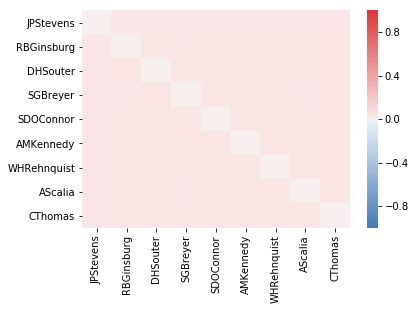

In [16]:
plot_heatmap(get_analytic_J(1e15))

In [ ]:
plot_heatmap(J_correct)

In [ ]:
myf(200000000000)

In [ ]:
myf(2060848.7340546646)

In [ ]:
A.reshape(81)

In [ ]:
def myf(gamma):
    J = get_analytic_J(gamma)
    A = J - J_correct
    return(np.sum(A.reshape((81)))**2)
    

In [ ]:
minimize_scalar(myf)

In [ ]:
pd.DataFrame(-1* get_analytic_J(18.7))

In [ ]:
J = get_analytic_J(1.4733947977065398)
pd.DataFrame(J)

In [ ]:
minimize_scalar(my_chi_squared)

In [ ]:
from scipy.optimize import minimize_scalar

In [ ]:
# IT DOESN'T MATTER NOW, BUT MAKE SURE THAT YOU UPDATE WITH THE REGULARIZATION TERM